In [1]:
import matplotlib.pyplot as plt 
from wellschematicspy import  WellSchema, OpenHole,Casing,Cement,Perforation,Tubing,BridgePlug,Sleeve,Plug,Packer

# Create a Simple Well Schematics.

You can create a well Schematics with the basics parametes with above a series of Python objects that were imported. 

As they are created on top of Pydantic you can easily export the data to either json or a dictionary


## Open Hole 

The first thing a well must have is a well defined Open Hole. 
To define a OpenHole it is required the **Top**, **Bottom** and **Diameter**

In [2]:
oh1 = OpenHole(
    name = 'surface_hole',
    top = 0,
    bottom=2000,
    diameter = 12.25
)

oh2 = OpenHole(
    name = 'production_hole',
    top = 2000,
    bottom=9356,
    diameter = 8.5
)

In [3]:
#oh1.to_series()

### Plot The Schematics

To plot a well Schematics you have to create an WellSchema Object and assign its attributes. 

One of the attributes you can attach to a WellSchema is a list of OpenHole Object

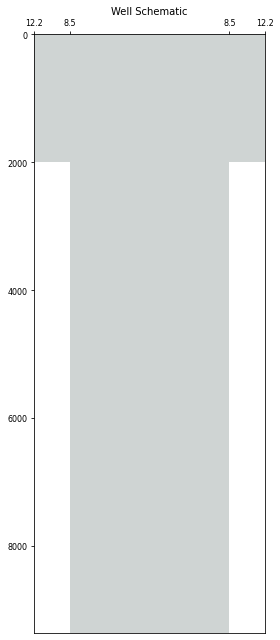

In [4]:
wsh = WellSchema(
    open_holes = [oh2,oh1]
)

wsh.plot(xtick=True)

## Add Casings

You can add casing to the WellSchema by creating the Casing object

In [5]:
csg1 = Casing(
    name='surface_casing',
    top=0,
    bottom=1990,
    diameter = 9.625
)

csg2 = Casing(
    name='surface_casing',
    top=0,
    bottom=9000,
    diameter = 7
)

### Plot WellSchema with Casings

To plot the Well Schema with the casings created above, just assing a list of Casings to WellSchema attribute *casings*

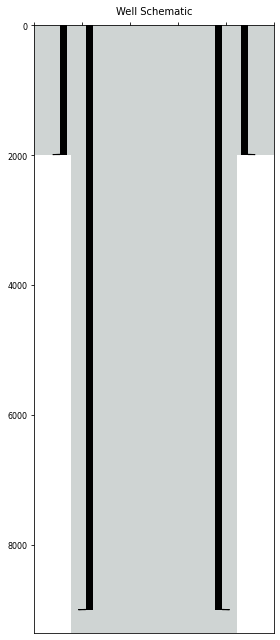

In [6]:
wsh.casings = [csg1,csg2]

wsh.plot()

## Add Cement

A Cement object must be attached to a Casing Object. You can define more than one cement to each casing



In [7]:
cmt1 = Cement(
    name='surface_cement',
    top=0,
    bottom=1985,
    oh=12.25
)

cmt2_sec1 = Cement(
    name='prod_cement',
    top=7000,
    bottom=9000,
    oh=8.5
)

cmt2_sec2 = Cement(
    name='squeeze',
    top=6500,
    bottom=6900,
    oh=8.5
)

If the WellSchema is already created just assign to each casing a list of cement object. 

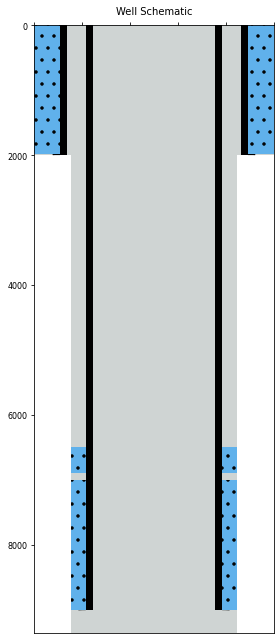

In [8]:
## 
wsh.casings[0].cement = [cmt1]
wsh.casings[1].cement = [cmt2_sec1,cmt2_sec2]

wsh.plot()

## Perforations

Like the Cement, Perforations are also attached to casings.

In [9]:
perf1 = Perforation(
    name='upper_perf',
    top=8300,
    bottom=8315,
    oh=8.5
)

perf2 = Perforation(
    name='mid_perf',
    top=8345,
    bottom=8377,
    oh=8.5
)

perf3 = Perforation(
    name='lower_perf',
    top=8500,
    bottom=8600,
    oh=8.5
)

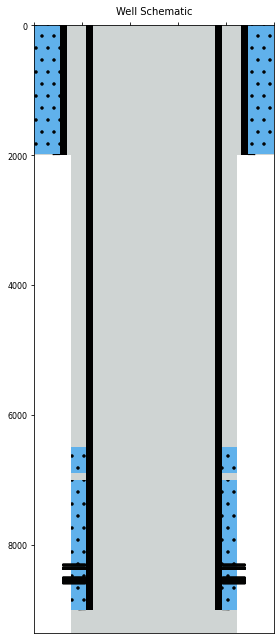

In [10]:
wsh.casings[1].perforations = [perf1,perf2,perf3]

wsh.plot()

You can set the depth limits when plotting the schema

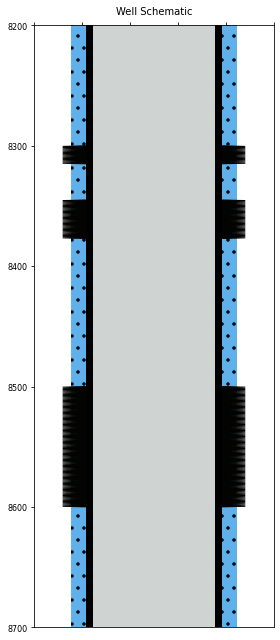

In [11]:
wsh.plot(lims=[8200,8700])

## Create Completion

You can create a simple completion schema by adding them to *completion* attribute in the well

In [12]:
tb1 = Tubing(
    name = 'Production String',
    top = 0,
    bottom = 8335,
    diameter = 3.5
)

pkr1 = Packer(
    name = 'packer1',
    top = 8330,
    bottom = 8335,
    diameter = 7,
    inner_diameter = 3.5
)

tb2 = Tubing(
    name = 'tb2',
    top = 8335,
    bottom = 8450,
    diameter = 3.5
)

pkr2 = Packer(
    name = 'Packer2',
    top = 8450,
    bottom = 8455,
    diameter = 7,
    inner_diameter = 3.5
)

tb3 = Tubing(
    name = 'Production String',
    top = 8450,
    bottom = 8550,
    diameter = 3.5
)

In [13]:
wsh.completion=[tb1,tb2,tb3,pkr2,pkr1]
wsh.completion

[Tubing(name='Production String', top=0.0, bottom=8335.0, install_date=None, remove_date=None, diameter=3.5, pipe_width=0.02, color=Color('#828783', rgb=(130, 135, 131)), hatch=None),
 Tubing(name='tb2', top=8335.0, bottom=8450.0, install_date=None, remove_date=None, diameter=3.5, pipe_width=0.02, color=Color('#828783', rgb=(130, 135, 131)), hatch=None),
 Tubing(name='Production String', top=8450.0, bottom=8550.0, install_date=None, remove_date=None, diameter=3.5, pipe_width=0.02, color=Color('#828783', rgb=(130, 135, 131)), hatch=None),
 Packer(name='Packer2', top=8450.0, bottom=8455.0, install_date=None, remove_date=None, diameter=7.0, inner_diameter=3.5, color=Color('#7a2222', rgb=(122, 34, 34)), hatch='xx'),
 Packer(name='packer1', top=8330.0, bottom=8335.0, install_date=None, remove_date=None, diameter=7.0, inner_diameter=3.5, color=Color('#7a2222', rgb=(122, 34, 34)), hatch='xx')]

(0.2142857142857143, 8450.0)
0.14285714285714285
5.0
(0.2142857142857143, 8330.0)
0.14285714285714285
5.0


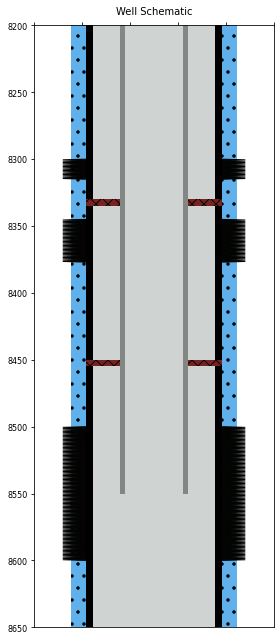

In [14]:

wsh.plot(lims=[8200,8650])

## Export & Import 

You can export the WellSchema to either dictionary or json due they are based pn Pydantic models. 

In the same way you can create a instance of any of the objects described so far from a dictionary

In [ ]:
dict_well = wsh.dict()

well_from_dict = WellSchema(**dict_well)

print(type(well_from_dict))